In [33]:
import time
import matplotlib.pyplot as plt
import random

1. В задаче 1 - разницу во времени вычисления при использовании обоих алгоритмов на одинаковых запросах. Построить два линейных графика. Запросить не менее 4х чисел

In [34]:
#трибоначчи рекурсией
def tribonacci_number_recursive(n):
    if n == 1 or n == 2:
        return 0
    if n == 3:
        return 1
    return tribonacci_number_recursive(n - 1) + tribonacci_number_recursive(n - 2) + tribonacci_number_recursive(n - 3)

#трибоначчи кэшированием
tribonacci_numbers_cache = [0, 0, 1]
for i in range(3, 100):
    tribonacci_numbers_cache.append(tribonacci_numbers_cache[i - 1] + tribonacci_numbers_cache[i - 2] + tribonacci_numbers_cache[i - 3])

#функция поиска времени выполнения
def calculate_time(function, numbers):
    times = []
    results = []
    for number in numbers:
        start_time = time.time()
        result = function(number)
        end_time = time.time()
        times.append(end_time - start_time)
        results.append(result)
    return results, times

#запрос на поиск для обоих методов
queries = [4, 8, 10, 16, 20]


Вычисляем запрос обоими алгоритмами

In [35]:
recursive_results, recursive_time = calculate_time(tribonacci_number_recursive, queries)
cache_results, cache_time = calculate_time(lambda n: tribonacci_numbers_cache[n - 1], queries)


График времени выполнения алгоритмов

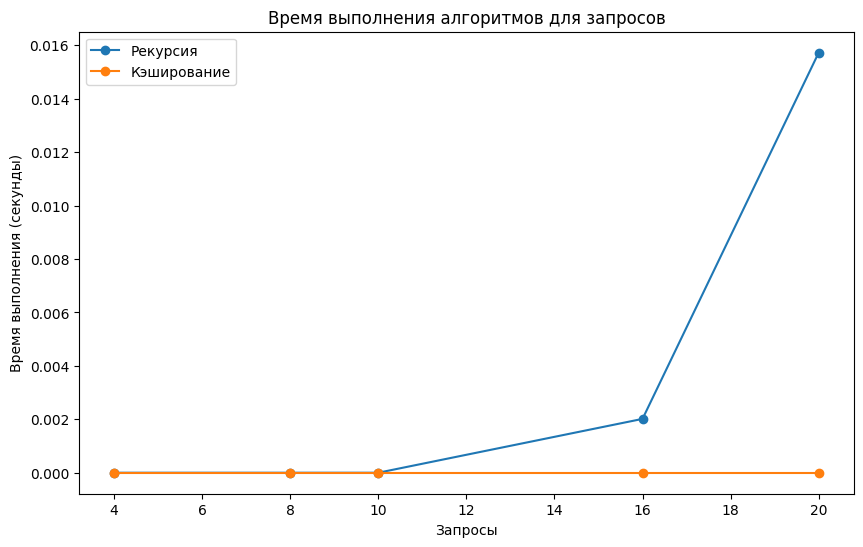

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(queries, recursive_time, label="Рекурсия", marker='o')
plt.plot(queries, cache_time, label="Кэширование", marker='o')
plt.xlabel("Запросы")
plt.ylabel("Время выполнения (секунды)")
plt.legend()
plt.title("Время выполнения алгоритмов для запросов")
plt.show()


Из графика видно, что метод кэширования выполяет запрос быстрее на больших числах, до 10 заметной разницы не наблюдается.

2. В задаче 2 - получающуюся сумму на случайном массиве  из 10 элементов целых отрицательных и положительных чисел. Построить гистограмму полученных сумм.

Случайные значения: [  2   5 -10  -7  -7  -3  -1   9   8  -6]


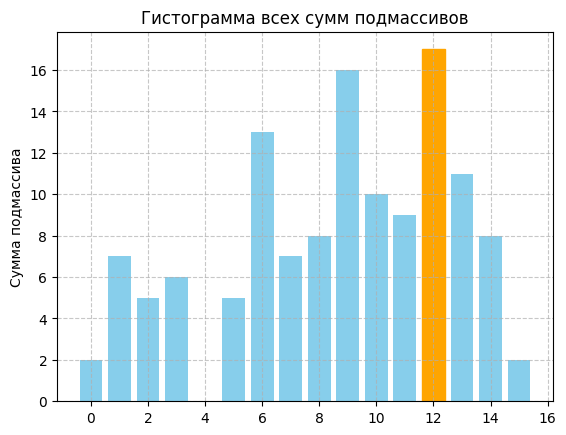

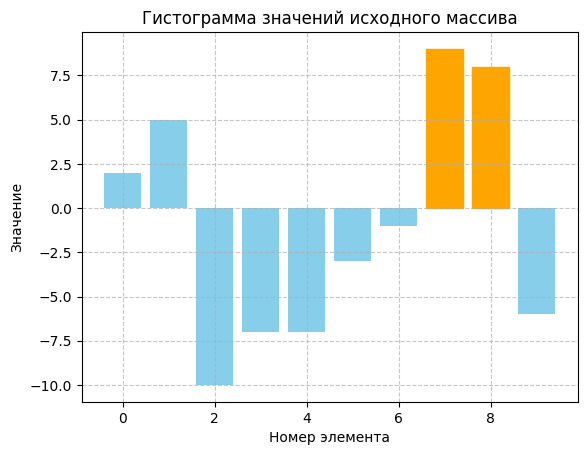

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#Находит максимальный подмассив в данном массиве чисел.
def maxSubArray(nums):
 
    sums = [nums[0]]
    maxSum = nums[0]
    maxPos = 0
    
    for i in range(1, len(nums)):
        if sums[i - 1] > 0:
            sums.append(sums[i - 1] + nums[i])
        else:
            sums.append(nums[i])
        
        if sums[i] > maxSum:
            maxSum = sums[i]
            maxPos = i
    
    if maxSum < 0:
        return nums[maxPos]
    
    endPos = maxPos
    startPos = endPos
    
    while startPos >= 0 and sums[startPos] >= 0:
        startPos -= 1

    return nums[startPos + 1:endPos + 1]

#Создает случайный массив из 10 эл-ов
np.random.seed(0)  
arr = np.random.randint(-10, 10, 10)
print("Случайные значения:", arr)

max_subarr = maxSubArray(arr)

#Создает список сумм всех возможных подмассивов.
def SubarraySums(nums):

    sums = []

    for i in range(len(nums)):
        curr_sum = 0
        for j in range(i, len(nums)):
            curr_sum += nums[j]
            if curr_sum >= 0:
                sums.append(curr_sum)
    
    return sums

subarr_sums = SubarraySums(arr)

indices = np.arange(len(subarr_sums))
bars = plt.bar(indices, subarr_sums, color='skyblue')
plt.ylabel('Сумма подмассива')
plt.title('Гистограмма всех сумм подмассивов')
plt.grid(True, linestyle='--', alpha=0.7)

# Выделяем максимальную сумму подмассива
for i in range(len(subarr_sums)):
    if subarr_sums[i] == max(subarr_sums):
        bars[i].set_color('orange')

plt.show()

indices = np.arange(len(arr))

bars = plt.bar(indices, arr, color='skyblue')
plt.xlabel('Номер элемента')
plt.ylabel('Значение')
plt.title('Гистограмма значений исходного массива')
plt.grid(True, linestyle='--', alpha=0.7)

# Изменяем цвет элементов, которые входят в max_subarray
for i in range(len(arr)):
    if arr[i] in max_subarr:
        bars[i].set_color('orange')

plt.show()
